# Upgrading pip

Although this is not nessasry it speeds up the process and imports newer libraries which are more up to date.

```
# !pip install --upgrade pip
```



In [ ]:
import pandas as pd

In [ ]:
skipped = pd.read_csv("/content/empty_list.csv")

In [ ]:
len(skipped)

114949

In [ ]:
!pip install --upgrade pip

# Installing Tensor Flow Lite


In [ ]:
!pip install tflite_model_maker

# Importing required libraries

In [ ]:
import tensorflow as tf
assert tf.__version__.startswith('2')
import os
import shutil

from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader

import matplotlib.pyplot as plt

# Importing Google Drive files

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

#!unzip "/content/gdrive/MyDrive/skunk_image_training_data/training.zip"

Mounted at /content/gdrive


# Setting image path


In [ ]:
image_path = '/content/gdrive/MyDrive/skunk_image_training_data/training_images_select'

print(image_path)

/content/gdrive/MyDrive/skunk_image_training_data/training_images_select


# File cleaning and preparation


In [ ]:
trainging_path = image_path

In [ ]:
!find "/content/gdrive/MyDrive/skunk_image_training_data/training_images_select/" -type f -name '*.jpg' -print0 | xargs -0 rename 's/.jpg$/.jpeg/'

In [ ]:
!sudo apt install jpeginfo

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  jpeginfo
0 upgraded, 1 newly installed, 0 to remove and 22 not upgraded.
Need to get 12.5 kB of archives.
After this operation, 34.8 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 jpeginfo amd64 1.6.0-6build1 [12.5 kB]
Fetched 12.5 kB in 0s (147 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg

In [ ]:
!find /content/gdrive/MyDrive/skunk_image_training_data/training_images_select -type f | perl -ne 'print $1 if m/\.([^.\/]+)$/' | sort -u

!find /content/gdrive/MyDrive/skunk_image_training_data/training_images_select -name '*DS_Store' -type f -delete

!find /content/gdrive/MyDrive/skunk_image_training_data/training_images_select -type f | perl -ne 'print $1 if m/\.([^.\/]+)$/' | sort -u

jpeg
jpeg


In [ ]:

!find /content/gdrive/MyDrive/skunk_image_training_data/training_images_select -type f \
\( -iname "*.jpg" \
 -o -iname "*.jpeg" \) \
-exec jpeginfo -c {} \; | \
grep -E "WARNING|ERROR" | \
cut -d " " -f 1

/content/gdrive/MyDrive/skunk_image_training_data/training_images_select/Empty/loc-h500ee07133450-004-479.jpeg


In [ ]:
os.remove("/content/gdrive/MyDrive/skunk_image_training_data/training_images_select/Empty/loc-h500ee07133450-004-479.jpeg")

# Creating train and rest data from images in image_path Directory

In [ ]:
data = DataLoader.from_folder(image_path, 
                              shuffle = True)
train_data, rest_data = data.split(0.8)


# Creating validation and test data from rest_data

In [ ]:
validation_data, test_data = rest_data.split(0.5)

# Tensor Flow Lite Model


## Leaving variables outside for easy reading and updating

In [ ]:
num_epochs = 85
learning_rate = 0.0001
batch_size = 4
shuffle = True
augmentation = False

## Training 

In [ ]:
# efficientnet_lite0'=
num_epochs = 500
learning_rate = 0.0001
batch_size = 4
shuffle = True
augmentation = False

model = image_classifier.create(train_data,
                                validation_data=validation_data,
                                model_spec=model_spec.get('efficientnet_lite0'), 
                                epochs =num_epochs, 
                                learning_rate= learning_rate,
                                batch_size = batch_size, 
                                shuffle= shuffle, 
                                use_augmentation= augmentation)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2 (HubKe  (None, 1280)             3413024   
 rasLayerV1V2)                                                   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 4)                 5124      
                                                                 
Total params: 3,418,148
Trainable params: 5,124
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/500


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


UnimplementedError: ignored

In [ ]:
snum_epochs = 500
learning_rate = 0.0001 #0.0001
batch_size = 4
shuffle = False #False
augmentation = False

model = image_classifier.create(train_data,
                                validation_data=validation_data,
                                model_spec=model_spec.get('efficientnet_lite2'), 
                                epochs = num_epochs, 
                                learning_rate = learning_rate,
                                batch_size = batch_size, 
                                shuffle = shuffle, 
                                use_augmentation= augmentation)


#77ms/step - loss: 0.3032 - accuracy: 1.0000 - val_loss: 0.3932 - val_accuracy: 0.9545

In [ ]:
num_epochs = 85
learning_rate = 0.0001 #0.0001
batch_size = 4
shuffle = True #True
augmentation = False

model = image_classifier.create(train_data,
                                validation_data=validation_data,
                                model_spec=model_spec.get('efficientnet_lite3'), 
                                epochs = num_epochs, 
                                learning_rate = learning_rate,
                                batch_size = batch_size, 
                                shuffle = shuffle, 
                                use_augmentation= augmentation)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2 (HubKe  (None, 1280)             6992768   
 rasLayerV1V2)                                                   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 4)                 5124      
                                                                 
Total params: 6,997,892
Trainable params: 5,124
Non-trainable params: 6,992,768
_________________________________________________________________
None
Epoch 1/85
1551/1551 [==============================] - 117s 68ms/step - loss: 0.8327 - accuracy: 0.7645 - val_loss: 0.6362 - val_accuracy: 0.8737
Epoch 2/85
1551/1551 [==============================] - 106s 68ms/step - loss: 0.6455 - 

In [ ]:
# efficientnet_lite4' NO BUENO

num_epochs = 500
learning_rate = 0.0001
batch_size = 4
shuffle = True
augmentation = True

model = image_classifier.create(train_data,
                                validation_data=validation_data,
                                model_spec=model_spec.get('efficientnet_lite4'), 
                                epochs = num_epochs, 
                                learning_rate = learning_rate,
                                batch_size = batch_size, 
                                shuffle = shuffle, 
                                use_augmentation= augmentation)

# Ploting loss, val, accuracy, & val loss

## Setting variables

In [ ]:
acc = model.history.history['accuracy']
val_acc = model.history.history['val_accuracy']
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
epochs_range = range(num_epochs)

## Plotting

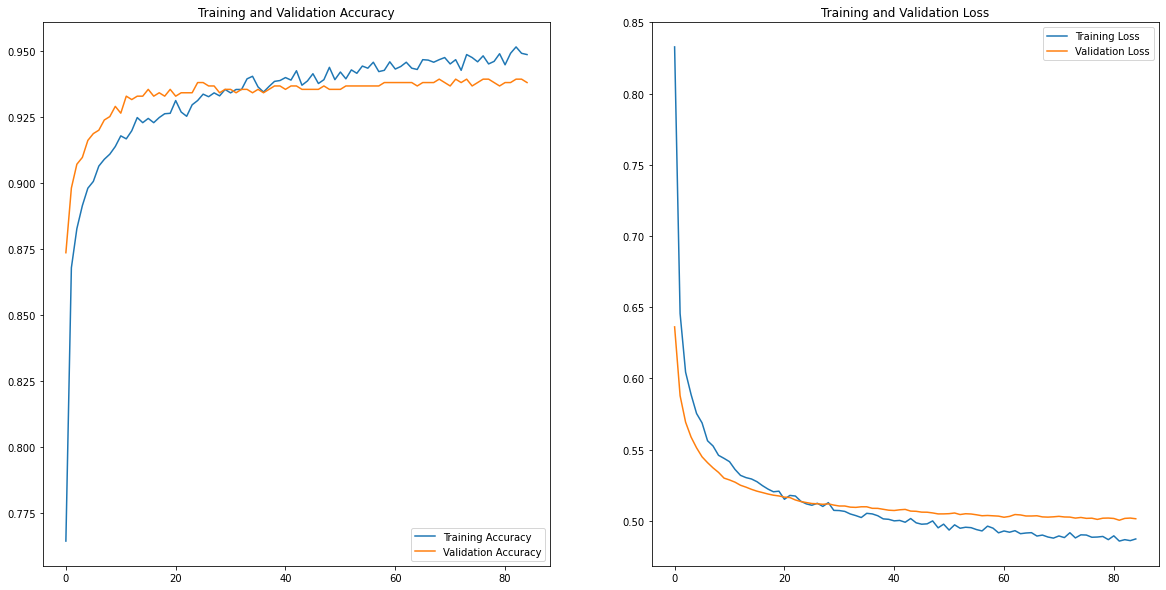

In [ ]:
plt.figure(figsize=(20, 10)) # width, height
plt.subplot(1, 2, 1) #rows, columns
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2 (HubKe  (None, 1280)             6992768   
 rasLayerV1V2)                                                   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 4)                 5124      
                                                                 
Total params: 6,997,892
Trainable params: 5,124
Non-trainable params: 6,992,768
_________________________________________________________________


# Exporting trained model

In [ ]:
newpath = r'/content/gdrive/MyDrive/SCI_Model/' 
if not os.path.exists(newpath):
    os.makedirs(newpath)

model.export(export_dir="/content/gdrive/MyDrive/SCI_Model/")